In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
df = pd.read_csv('churn.csv')

In [350]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [352]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [353]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [354]:
df.drop('customerID', axis=1, inplace=True)

In [355]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

In [356]:
df_dum = pd.get_dummies(df)
df_dum.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [357]:
df_dum.dropna(inplace=True)

In [358]:
df_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [360]:
class_0 = df_dum[df_dum['Churn'] == 0]
class_1 = df_dum[df_dum['Churn'] == 1]

In [361]:
len(class_0), len(class_1)

(5163, 1869)

In [362]:
class_1_over = class_1.sample(len(class_0), replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [432]:
y = test_over['Churn'].values
X = test_over.drop(columns = ['Churn'])

In [433]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [435]:
X_train.shape, y_train.shape

((7228, 45), (7228,))

In [436]:
assert not np.any(np.isnan(X_train))

In [437]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model

In [489]:
inp = Input((X_train.shape[-1]))

x = Dense(1024, activation='relu')(inp)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(64, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(8, activation='relu')(x)
pred = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[inp], outputs=[pred])
opt = tf.keras.optimizers.SGD(learning_rate=5e-3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [490]:
model.summary()

Model: "model_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_58 (InputLayer)        [(None, 45)]              0         
_________________________________________________________________
dense_327 (Dense)            (None, 1024)              47104     
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_328 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_67 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_329 (Dense)            (None, 8)                 8200      
_________________________________________________________________
dense_330 (Dense)            (None, 1)                 9  

In [491]:
def scheduler(epoch, lr):
    if epoch < 25:
        return lr
    # elif 50 < epoch < 75:
    #     return lr * 0.5
    else:
        return lr * 0.5

In [492]:
batch_size = 8
callbacks = [#tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=1e-6, verbose=1),
            tf.keras.callbacks.LearningRateScheduler(scheduler)
]
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=50, validation_data=(X_test, y_test),
                    validation_batch_size=batch_size)
                    # ,callbacks=callbacks)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
903/904 [============================>.] - ETA: 0s - loss: 0.6701 - accuracy: 0.5791WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f8628e7d2f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

KeyboardInterrupt: 

0.7666236162185669
26


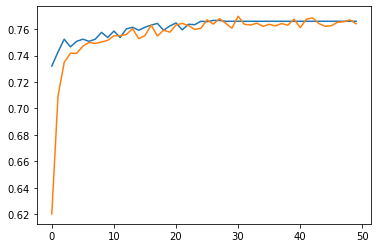

In [487]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
print(max(history.history['val_accuracy']))
print(history.history['val_accuracy'].index(max(history.history['val_accuracy'])))

0.48730507493019104
27


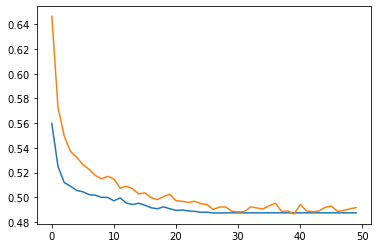

In [488]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

print(min(history.history['val_loss']))
print(history.history['val_loss'].index(min(history.history['val_loss'])))

In [430]:
pred = model.predict(X_test)

pred_int = []
for i in pred:
    if i <= 0.5:
        pred_int.append(0)
    else:
        pred_int.append(1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [431]:
print(classification_report(y_test, pred_int))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1002
           1       0.85      0.92      0.88      1064

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066



In [317]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [318]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7831558567279767


In [414]:
from sklearn.linear_model import LogisticRegression

In [415]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [416]:
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [221]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [217]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
model = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [219]:
pred = model.predict(X_test)

In [222]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.44      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [223]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [58]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [224]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.75      0.75      0.75      1407



In [225]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [61]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [226]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407

